In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
market_basket_df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)
market_basket_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
basket_items = []
for index, row in market_basket_df.iterrows():
    basket_items.append([str(row[i]) for i in range(0, 20) if str(row[i]) != 'nan'])
    cleaned_items = [item for item in row if str(item) != 'nan']
    basket_items.append(cleaned_items)
basket_items[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney']]

In [5]:
#
#
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
item_counts = {}
for col in transaction_df.columns:
    item_counts[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_counts.values()),
                            index=list(item_counts.keys()),
                            columns=['frequency']).sort_values(by='frequency',
                                                               ascending=False)
item_freq_df.shape, item_freq_df.head(10)

((120, 1),
                    frequency
 mineral water           3576
 eggs                    2696
 spaghetti               2612
 french fries            2564
 chocolate               2458
 green tea               1982
 milk                    1944
 ground beef             1474
 frozen vegetables       1430
 pancakes                1426)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

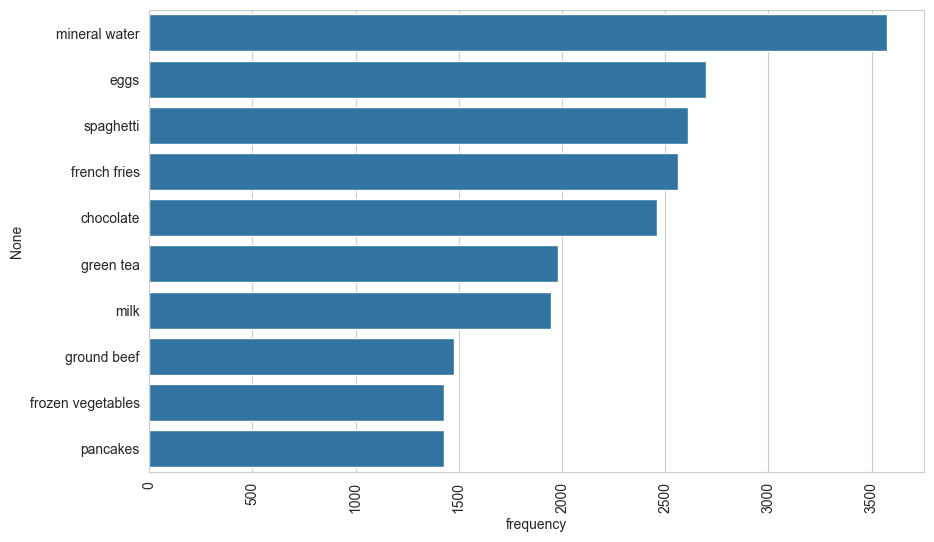

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(y=item_freq_df.index[:10], x=item_freq_df['frequency'][:10])  
plt.xticks(rotation=90)

In [10]:
apriori(transaction_df, min_support=0.1, use_colnames=True)

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [18]:
print(f"freq>200: {item_freq_df[item_freq_df>200].shape[0]} items")
print(f"freq>100: {item_freq_df[item_freq_df>100].shape[0]} items")
print(f"freq>50: {item_freq_df[item_freq_df>50].shape[0]} items")

pd.set_option('display.max_rows', 15)
freq_itemset_support = apriori(transaction_df,min_support=0.03, use_colnames=True)
freq_itemset_support

freq>200: 120 items
freq>100: 120 items
freq>50: 120 items


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
...,...,...
49,0.039195,"(spaghetti, ground beef)"
50,0.047994,"(milk, mineral water)"
51,0.035462,"(milk, spaghetti)"
52,0.033729,"(mineral water, pancakes)"


In [ ]:
overal_assosioation_rules =association_rules(freq_itemset_support, metric='support', min_threshold=0.03)
overal_assosioation_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,1.0,0.003751,1.028711,0.135143,0.106959,0.027910,0.193661
1,(eggs),(chocolate),0.179709,0.163845,0.033196,0.184718,1.127397,1.0,0.003751,1.025603,0.137757,0.106959,0.024963,0.193661
2,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,1.0,0.006393,1.046827,0.224169,0.114514,0.044732,0.205587
3,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,1.0,0.006393,1.049383,0.222275,0.114514,0.047059,0.205587
4,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,1.0,0.010898,1.111823,0.389677,0.122959,0.100577,0.222018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,1.0,0.012900,1.093043,0.440468,0.132207,0.085123,0.238669
32,(mineral water),(pancakes),0.238368,0.095054,0.033729,0.141499,1.488616,1.0,0.011071,1.054100,0.430963,0.112544,0.051323,0.248169
33,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,1.0,0.011071,1.180529,0.362712,0.112544,0.152922,0.248169
34,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796


In [ ]:
trans_wo_water_df = transaction_df.drop(columns=['water'])
